In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit


In [2]:
# Model-specific imports:
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [4]:
# IMPORTING ALL DATA:
inputData = pd.read_excel('../Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)

# IMPORTING ONLY TOP FEATURES:
topFeaturesData = pd.read_excel('../meryck/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

print(inputData.head())
topFeaturesData.head()

      S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
2080  2081                 21494.0              865.3   
3266  3267                  7203.9              155.3   
549    550                 10911.7              453.0   
2613  2614                 15716.8              372.8   
3532  3533                  5441.7              207.0   

      Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
2080                       11248.8                 48133.2         6173.2   
3266                       13218.4                 46144.5         6142.5   
549                        16499.3                 51402.0         6488.8   
2613                       15894.9                 58462.7         6634.5   
3532                       12493.1                 50924.0         7775.3   

      Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
2080        2418.0        3642.4         1327.5         2296.9  ...   
3266        3236.0        4356.0         2228.7     

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
2357,2358,7677.5,776.9,3843.9,1625.9,584.2,7220.2,5734.9,793.7,272209.9367,...,2.706,2.779,2.778,2.304,2.833,2.618,3.022,2.900,2.67977,21
1978,1979,8944.6,886.0,4671.5,1509.9,323.4,8227.3,4689.2,491.9,245939.5700,...,2.384,2.558,2.629,2.084,2.591,2.351,2.764,2.397,2.41048,44
2977,2978,6396.4,1905.2,3436.4,1231.8,993.8,6049.2,3977.8,436.2,203792.9059,...,2.283,2.355,2.260,1.955,2.375,2.256,2.623,2.328,2.33063,82
3501,3502,8846.2,1363.1,4662.4,2018.1,350.0,9049.0,5516.2,573.5,276159.3875,...,2.587,2.834,2.707,2.243,2.756,2.553,3.088,2.599,2.62178,32
1471,1472,5859.0,1236.6,3374.0,1258.1,659.0,5879.0,3965.3,342.4,195382.3408,...,2.363,2.407,2.365,2.130,2.456,2.313,2.587,2.430,2.35303,77


In [5]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [6]:
# BUILDING INPUT AND OUTPUT VARIABLES USING THE TOP FEATURES:
# select the input brain volume vector (X) and the output age vector (y)
X_fs = topFeaturesData.drop(columns=['S.No', 'Age'])
y_fs = topFeaturesData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=3)

In [5]:
# instantiate a decision tree model using sklearn:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=6, min_samples_leaf=4, min_samples_split=2)


# fit the model to the training data
dt_model.fit(X_train, y_train)

/Users/agamaulakh/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=4)

In [6]:
# check the model's performance on unseen, test data
dt_predictions = dt_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, dt_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, dt_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, dt_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))

r square value: 0.7740690500401781
mean absolute error (years): 6.885668549285626
mean square error: 87.64568292631203
root mean sqaure error (years): 9.361927308322365


In [186]:
param_dict={"criterion" : ['friedman_mse', 'mse', 'mae'],
            "max_depth" : range(1,10),
            "min_samples_split" : range(2,10), 
            "min_samples_leaf" : range(2,5)
           }
grid = GridSearchCV(dt_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s finished


{'criterion': 'mse'}


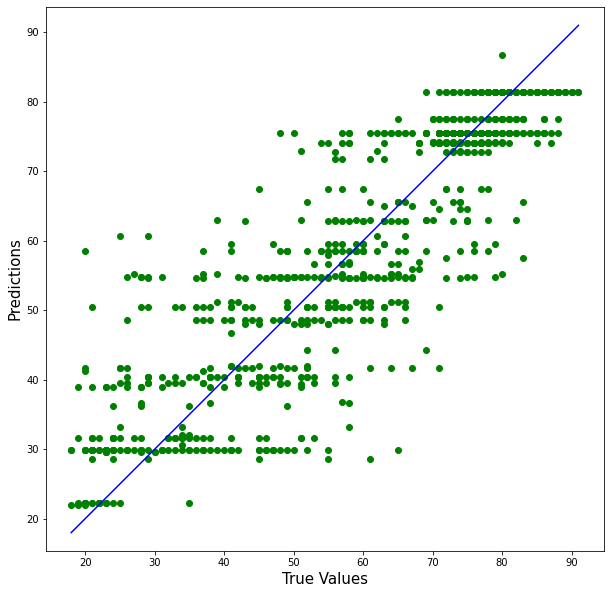

In [7]:
# Exploring the predictions after hyperparameter tuning
plt.figure(figsize=(10,10))
plt.scatter(y_test, dt_predictions, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(dt_predictions), max(y_test))
p2 = min(min(dt_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [18]:
# Running model again using top features

# fit the model to the training data
dt_model.fit(X_train_fs, y_train_fs)

# check the model's performance on unseen, test data
dt_predictions_fs = dt_model.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test_fs, dt_predictions_fs))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test_fs, dt_predictions_fs))
print('mean square error:', metrics.mean_squared_error(y_test_fs, dt_predictions_fs))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test_fs, dt_predictions_fs)))


r square value: 0.7305617914239729
mean absolute error (years): 7.72256894307863
mean square error: 106.91419254720284
root mean sqaure error (years): 10.339931941130118


/Users/agamaulakh/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### ADA Boost Regressor (based on DT)

In [19]:
# instantiate a voting regressor model using sklearn:
abr_model = AdaBoostRegressor(loss='linear', learning_rate= 1, n_estimators= 200)


# fit the model to the training data
abr_model.fit(X_train, y_train)


# check the model's performance on unseen, test data
abr_predictions = abr_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, abr_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, abr_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, abr_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, abr_predictions)))

r square value: 0.8219578324981673
mean absolute error (years): 6.938155249955599
mean square error: 72.05489675353286
root mean sqaure error (years): 8.488515580096019


In [203]:
# Using a gridsearch to find te best hyperparameters
param_dict={"loss" : ['linear', 'square', 'exponential'],
            "n_estimators" : [10, 50, 100],
            "learning_rate" : [0.5, 1, 5]
           }
grid = GridSearchCV(vr_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.0min finished


{'learning_rate': 1, 'n_estimators': 100}


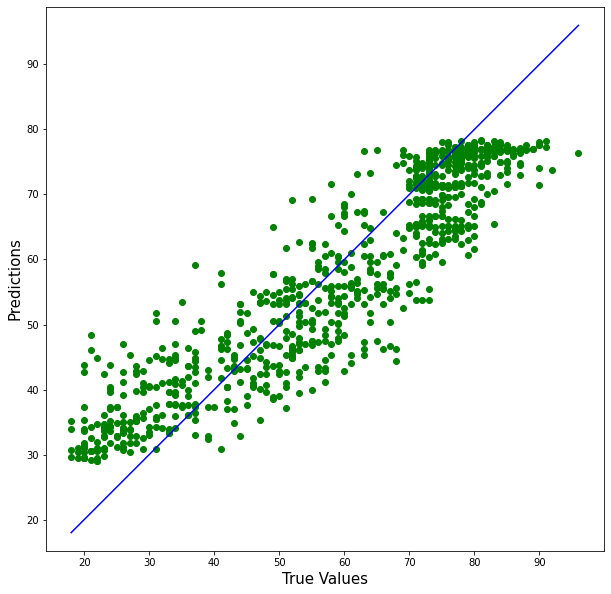

In [20]:
# Exploring the predictions after hyperparameter tuning
plt.figure(figsize=(10,10))
plt.scatter(y_test, abr_predictions, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(abr_predictions), max(y_test))
p2 = min(min(abr_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [23]:
# Running model again using top features

# fit the model to the training data
abr_model.fit(X_train_fs, y_train_fs)

# check the model's performance on unseen, test data
abr_predictions_fs = abr_model.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test_fs, abr_predictions_fs))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test_fs, abr_predictions_fs))
print('mean square error:', metrics.mean_squared_error(y_test_fs, abr_predictions_fs))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test_fs, abr_predictions_fs)))

r square value: 0.780554414326057
mean absolute error (years): 7.581336452083206
mean square error: 87.07691356906211
root mean sqaure error (years): 9.331501142316927


### Neural Network

In [1]:
import tensorflow as tf
import csv
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

In [7]:
# setting inputs
dataSet = inputData

# need to conver to a numpy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


# using 250 epochs to train neural network
maxEpoch = 250
verbNum = 1

# building an ANN with 5 hidden layers with ReLu activation function
base_ann = tf.keras.models.Sequential([
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=20, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='linear')
        ])

# not using: convolution layers, drop outs, max pooling

# adding an adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compiling neural network
base_ann.compile(loss="mae", optimizer=optimizer)

# fitting neural network to input data
base_ann.fit(X_train, y_train, epochs=maxEpoch, batch_size=64, verbose=verbNum)

# predicting based on unseen data
ann_predictions = base_ann.predict(X_test)

# printing metrics
print("rscore: ", metrics.r2_score(y_test, ann_predictions))
print("MAE: ", metrics.mean_absolute_error(y_test, ann_predictions))
print("MSE: ", np.sqrt(metrics.mean_squared_error(y_test, ann_predictions)))

Train on 3380 samples
Epoch 1/250
3380/3380 [==============================] - 6s 2ms/sample - loss: 12354.3427
Epoch 2/250
3380/3380 [==============================] - 2s 622us/sample - loss: 2983.2891
Epoch 3/250
3380/3380 [==============================] - 4s 1ms/sample - loss: 3884.9805
Epoch 4/250
3380/3380 [==============================] - 2s 588us/sample - loss: 2175.9733
Epoch 5/250
3380/3380 [==============================] - 1s 293us/sample - loss: 1253.4553
Epoch 6/250
3380/3380 [==============================] - 1s 342us/sample - loss: 1210.9146
Epoch 7/250
3380/3380 [==============================] - 1s 289us/sample - loss: 740.7393
Epoch 8/250
3380/3380 [==============================] - 1s 295us/sample - loss: 864.9416
Epoch 9/250
3380/3380 [==============================] - 1s 285us/sample - loss: 320.7401
Epoch 10/250
3380/3380 [==============================] - 1s 314us/sample - loss: 288.5603
Epoch 11/250
3380/3380 [==============================] - 1s 303us/sample 

3380/3380 [==============================] - 1s 359us/sample - loss: 20.6033
Epoch 92/250
3380/3380 [==============================] - 1s 292us/sample - loss: 15.7197
Epoch 93/250
3380/3380 [==============================] - 1s 330us/sample - loss: 16.1551
Epoch 94/250
3380/3380 [==============================] - 1s 390us/sample - loss: 16.5375
Epoch 95/250
3380/3380 [==============================] - 1s 283us/sample - loss: 17.2856
Epoch 96/250
3380/3380 [==============================] - 1s 277us/sample - loss: 17.2466
Epoch 97/250
3380/3380 [==============================] - 1s 281us/sample - loss: 15.8708
Epoch 98/250
3380/3380 [==============================] - 1s 316us/sample - loss: 14.2390
Epoch 99/250
3380/3380 [==============================] - 1s 240us/sample - loss: 16.4449
Epoch 100/250
3380/3380 [==============================] - 1s 269us/sample - loss: 16.6258
Epoch 101/250
3380/3380 [==============================] - 1s 266us/sample - loss: 16.4049
Epoch 102/250
3380/33

3380/3380 [==============================] - 1s 326us/sample - loss: 12.8999
Epoch 182/250
3380/3380 [==============================] - 1s 187us/sample - loss: 12.7346
Epoch 183/250
3380/3380 [==============================] - 1s 197us/sample - loss: 12.3441
Epoch 184/250
3380/3380 [==============================] - 1s 202us/sample - loss: 12.6011
Epoch 185/250
3380/3380 [==============================] - 1s 239us/sample - loss: 12.7394
Epoch 186/250
3380/3380 [==============================] - 1s 279us/sample - loss: 12.0577
Epoch 187/250
3380/3380 [==============================] - 1s 410us/sample - loss: 12.2126
Epoch 188/250
3380/3380 [==============================] - 1s 264us/sample - loss: 12.0875
Epoch 189/250
3380/3380 [==============================] - 1s 244us/sample - loss: 12.1968
Epoch 190/250
3380/3380 [==============================] - 1s 309us/sample - loss: 12.2451
Epoch 191/250
3380/3380 [==============================] - 1s 306us/sample - loss: 11.5230
Epoch 192/250

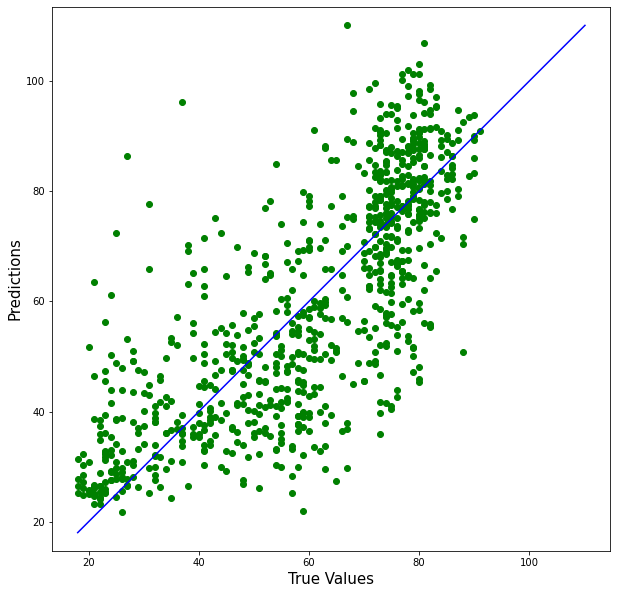

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ann_predictions, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(ann_predictions), max(y_test))
p2 = min(min(ann_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# RUNNING SAME NEURAL NETWORK USING TOP FEATURES

# need to conver to a numpy array
X_train_fs = np.asarray(X_train_fs)
y_train_fs = np.asarray(y_train_fs)
X_test_fs = np.asarray(X_test_fs)
y_test_fs = np.asarray(y_test_fs)


# using 250 epochs to train neural network
maxEpoch = 250
verbNum = 1

# building an ANN with 5 hidden layers with ReLu activation function
base_ann_fs = tf.keras.models.Sequential([
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=20, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='linear')
        ])

# not using: convolution layers, drop outs, max pooling

# adding an adam optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compiling neural network
base_ann_fs.compile(loss="mae", optimizer=optimizer)

# fitting neural network to input data
base_ann_fs.fit(X_train_fs, y_train_fs, epochs=maxEpoch, batch_size=64, verbose=verbNum)

# predicting based on unseen data
ann_predictions_fs = base_ann_fs.predict(X_test_fs)

# printing metrics
print("rscore: ", metrics.r2_score(y_test_fs, ann_predictions_fs))
print("MAE: ", metrics.mean_absolute_error(y_test_fs, ann_predictions_fs))
print("MSE: ", np.sqrt(metrics.mean_squared_error(y_test_fs, ann_predictions_fs)))

Train on 3380 samples
Epoch 1/250
3380/3380 [==============================] - 5s 1ms/sample - loss: 3058.5391
Epoch 2/250
3380/3380 [==============================] - 1s 197us/sample - loss: 1067.2792
Epoch 3/250
3380/3380 [==============================] - 1s 206us/sample - loss: 277.3841
Epoch 4/250
3380/3380 [==============================] - 1s 204us/sample - loss: 303.4834
Epoch 5/250
3380/3380 [==============================] - 1s 195us/sample - loss: 360.5626
Epoch 6/250
3380/3380 [==============================] - 1s 256us/sample - loss: 219.0174
Epoch 7/250
3380/3380 [==============================] - 1s 341us/sample - loss: 184.0609
Epoch 8/250
3380/3380 [==============================] - 1s 305us/sample - loss: 101.9155
Epoch 9/250
3380/3380 [==============================] - 1s 277us/sample - loss: 87.7854
Epoch 10/250
3380/3380 [==============================] - 1s 304us/sample - loss: 103.4491
Epoch 11/250
3380/3380 [==============================] - 1s 257us/sample - lo

3380/3380 [==============================] - 1s 196us/sample - loss: 13.9033
Epoch 92/250
3380/3380 [==============================] - 1s 186us/sample - loss: 14.8947
Epoch 93/250
3380/3380 [==============================] - 1s 180us/sample - loss: 14.2327
Epoch 94/250
3380/3380 [==============================] - 1s 176us/sample - loss: 13.8773
Epoch 95/250
3380/3380 [==============================] - 1s 188us/sample - loss: 14.1290
Epoch 96/250
3380/3380 [==============================] - 1s 183us/sample - loss: 14.6083
Epoch 97/250
3380/3380 [==============================] - 1s 181us/sample - loss: 16.8577
Epoch 98/250
3380/3380 [==============================] - 1s 192us/sample - loss: 13.3626
Epoch 99/250
3380/3380 [==============================] - 1s 182us/sample - loss: 12.9873
Epoch 100/250
3380/3380 [==============================] - 1s 207us/sample - loss: 13.2919
Epoch 101/250
3380/3380 [==============================] - 1s 197us/sample - loss: 14.2020
Epoch 102/250
3380/33

3380/3380 [==============================] - 1s 193us/sample - loss: 14.5964
Epoch 182/250
3380/3380 [==============================] - 1s 171us/sample - loss: 13.2859
Epoch 183/250
3380/3380 [==============================] - 1s 171us/sample - loss: 13.4749
Epoch 184/250
3380/3380 [==============================] - 1s 250us/sample - loss: 13.4221
Epoch 185/250
3380/3380 [==============================] - 1s 259us/sample - loss: 13.5526
Epoch 186/250
3380/3380 [==============================] - 1s 249us/sample - loss: 13.6951
Epoch 187/250
3380/3380 [==============================] - 1s 333us/sample - loss: 13.5848
Epoch 188/250
3380/3380 [==============================] - 1s 332us/sample - loss: 14.3076
Epoch 189/250
3380/3380 [==============================] - 1s 265us/sample - loss: 13.5192
Epoch 190/250
3380/3380 [==============================] - 1s 218us/sample - loss: 13.8312
Epoch 191/250
3380/3380 [==============================] - 1s 223us/sample - loss: 14.4662
Epoch 192/250

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_fs, ann_predictions_fs, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(ann_predictions_fs), max(y_test_fs))
p2 = min(min(ann_predictions_fs), min(y_test_fs))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()